In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/heart_disease_uci (2).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data=pd.read_csv('/content/heart_disease_uci (2).csv')
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
# Select columns with non-numeric data types
categorical_columns = data.select_dtypes(include=['object'])

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns.columns.tolist())

Categorical Columns:
['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
# Select columns with numeric data types
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Print the list of numeric columns
print("Numeric Columns:")
print(numeric_columns.columns.tolist())

Numeric Columns:
['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [ ]:
# Impute missing values with mode for each categorical feature
for col in categorical_columns:
    mode_value = data[col].mode()[0]  # Calculate the mode value for the current column
    data[col].fillna(mode_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [ ]:
duplicat=data[data.duplicated()]

In [ ]:
duplicat

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.combine import SMOTEENN
from collections import Counter
import xgboost as xgb

# Load data
# Replace with your dataset path
# data = pd.read_csv('/path/to/your/dataset.csv')

# Drop 'id' column if it exists
# data = data.drop(columns=['id'], errors='ignore')

# Handle missing values
# data = data.dropna()  # Alternatively, use imputation methods if data loss is too high

# Filter categorical columns present in the DataFrame
categorical_cols = [col for col in ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'] if col in data.columns]

# Perform One-Hot Encoding for the filtered categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define target variable 'num' (assuming binary classification)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Split dataset into features (X) and target (y)
X = data.drop(columns=['num'])
y = data['num']

# Apply SelectKBest for feature selection (keeping top 12 features)
selection = SelectKBest(f_classif, k=12)
X_selected = selection.fit_transform(X, y)
X = X[X.columns[selection.get_support()]]

# Handle class imbalance with SMOTEENN
st = SMOTEENN()
X_resampled, y_resampled = st.fit_resample(X, y)
print("The number of classes before resampling:", Counter(y))
print("The number of classes after resampling:", Counter(y_resampled))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, stratify=y_resampled)

# Define models
Models = [
    LogisticRegression(random_state=42, max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False),
    SVC(random_state=42, probability=True)
]

# Initialize results DataFrame
result_col = ["Algorithm", "Accuracy Mean", "Precision Mean", "Recall Mean", "F1-Score Mean"]
model_results = pd.DataFrame(columns=result_col)

# Model evaluation loop
for i, model in enumerate(Models):
    try:
        kfold = KFold(n_splits=10)

        # Cross-validation for different metrics
        cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
        cv_precision_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="precision_macro")
        cv_recall_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall_macro")
        cv_f1_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_macro")

        # Store results
        model_results.loc[i] = [
            type(model).__name__,
            round(cv_acc_results.mean() * 100, 2),
            round(cv_precision_results.mean() * 100, 2),
            round(cv_recall_results.mean() * 100, 2),
            round(cv_f1_results.mean() * 100, 2)
        ]
    except Exception as e:
        print(f"Error with {type(model).__name__}: {e}")

# Sort results by accuracy
model_results = model_results.sort_values(by=["Accuracy Mean"], ascending=False)

# Print the results
print(model_results)


The number of classes before resampling: Counter({1: 509, 0: 411})
The number of classes after resampling: Counter({0: 317, 1: 284})
Error with XGBClassifier: 'super' object has no attribute '__sklearn_tags__'
                    Algorithm  Accuracy Mean  Precision Mean  Recall Mean  \
2      RandomForestClassifier          98.67           98.64        98.69   
3  GradientBoostingClassifier          98.22           98.38        98.06   
0          LogisticRegression          94.00           94.11        93.94   
5                         SVC          93.33           94.13        92.85   
1                  GaussianNB          86.44           87.74        86.13   

   F1-Score Mean  
2          98.63  
3          98.18  
0          93.86  
5          93.05  
1          86.07  


Classes before resampling: Counter({0: 160, 1: 139})
Classes after resampling: Counter({0: 59, 1: 56})
Error with XGBClassifier: 'super' object has no attribute '__sklearn_tags__'
                    Algorithm  Accuracy Mean  Precision Mean  Recall Mean  \
5                         SVC          96.39           95.50        98.00   
2      RandomForestClassifier          95.42           97.50        94.07   
3  GradientBoostingClassifier          95.42           96.25        96.00   
0          LogisticRegression          94.03           92.17        98.00   
1                  GaussianNB          92.92           94.17        94.07   

   F1-Score Mean  
5          96.35  
2          95.26  
3          95.40  
0          94.35  
1          93.26  
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.4663 - loss: 0.7370 - val_accuracy: 0.8621 - val_loss: 0.6141
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6761 - loss: 0.6368 - val_accuracy: 0.9655 - val_los

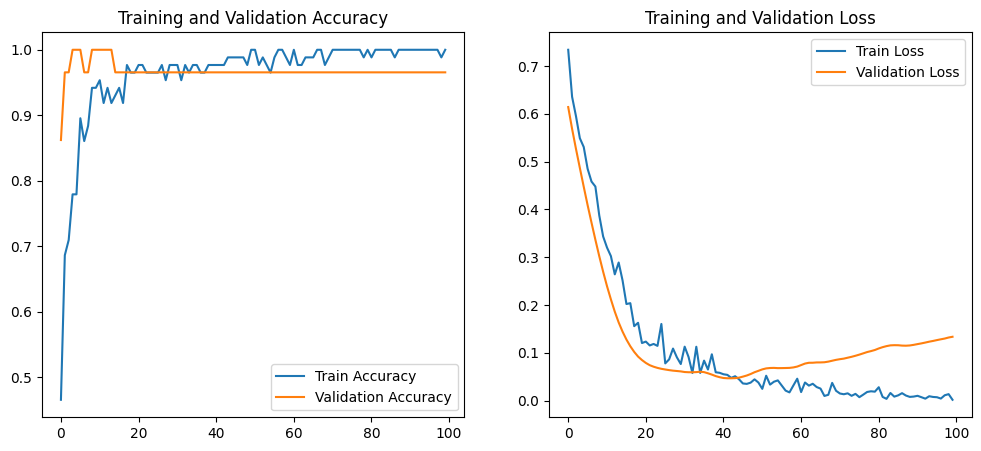

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTEENN
from collections import Counter
import xgboost as xgb
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load data
data = pd.read_csv('/content/heart_disease_uci (2).csv')  # Update file path as needed
data = data.drop(columns=['id'], errors='ignore')  # Drop 'id' column if it exists

# Handle missing values
data = data.dropna()  # Drop rows with missing values

# Categorical encoding
categorical_cols = [col for col in ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'] if col in data.columns]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Convert target variable 'num' into binary (1 for presence, 0 for absence)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Features and target
X = data.drop(columns=['num'])
y = data['num']

# Feature selection
selection = SelectKBest(f_classif, k=12)
X = X[X.columns[selection.fit(X, y).get_support()]]

# Handle class imbalance
st = SMOTEENN()
X_st, y_st = st.fit_resample(X, y)
print("Classes before resampling:", Counter(y))
print("Classes after resampling:", Counter(y_st))

# Feature scaling
scaler = StandardScaler()
X_st = scaler.fit_transform(X_st)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, random_state=42, stratify=y_st)

# Define models
Models = [
    LogisticRegression(random_state=42, max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42),
    SVC(random_state=42, probability=True)
]

# Evaluate models using cross-validation
result_col = ["Algorithm", "Accuracy Mean", "Precision Mean", "Recall Mean", "F1-Score Mean"]
model_results = pd.DataFrame(columns=result_col)

for i, model in enumerate(Models):
    try:
        kfold = KFold(n_splits=10)
        cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
        cv_precision_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="precision")
        cv_recall_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")
        cv_f1_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1")

        model_results.loc[i] = [
            type(model).__name__,
            round(cv_acc_results.mean() * 100, 2),
            round(cv_precision_results.mean() * 100, 2),
            round(cv_recall_results.mean() * 100, 2),
            round(cv_f1_results.mean() * 100, 2)
        ]
    except Exception as e:
        print(f"Error with {type(model).__name__}: {e}")

# Display results
model_results = model_results.sort_values(by=["Accuracy Mean"], ascending=False)
print(model_results)

# Deep Learning Model
def create_dl_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train deep learning model
model = create_dl_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate deep learning model
y_pred_dl = (model.predict(X_test) > 0.5).astype("int32")
print("\nDeep Learning Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print("Precision:", precision_score(y_test, y_pred_dl))
print("Recall:", recall_score(y_test, y_pred_dl))
print("F1-Score:", f1_score(y_test, y_pred_dl))

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")

plt.show()


In [ ]:
!pip install --upgrade pip
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.2 MB/s eta 0:00:00


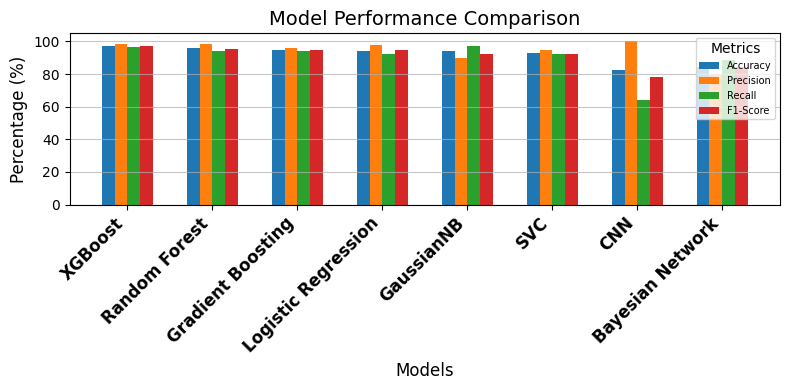

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "XGBoost", "Random Forest", "Gradient Boosting",
    "Logistic Regression", "GaussianNB", "SVC", "CNN", "Bayesian Network"
]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [
    [97.32, 98.33, 96.67, 97.09],  # XGBoost
    [95.89, 98.33, 94.17, 95.66],  # Random Forest
    [94.64, 96.00, 94.17, 94.89],  # Gradient Boosting
    [94.46, 98.00, 92.17, 94.57],  # Logistic Regression
    [94.29, 90.00, 97.50, 92.33],  # GaussianNB
    [93.04, 94.67, 92.17, 92.57],  # SVC
    [82.75, 100.00, 64.28, 78.26], # CNN
    [84.21, 80.00, 88.88, 84.21],  # Bayesian Network
]

# Bar graph settings
x = np.arange(len(models))  # Label locations
width = 0.15  # Bar width
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Distinct colors for each metric

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))  # Decreased graph size
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * width, [row[i] for row in values], width, label=metric, color=color)

# Customization
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12, fontweight="bold")
ax.legend(title="Metrics", fontsize=7)
ax.grid(axis="y", linestyle="-", alpha=0.7)

plt.tight_layout()
plt.show()
